In [25]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from matplotlib import pyplot as plt
from statsmodels.stats.outliers_influence import OLSInfluence
%matplotlib inline
plt.style.use('ggplot')
import statsmodels.api as sm

In [3]:
df=pd.read_csv('datasets/Carseats.csv')
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
# creating multiple linear regression using urban us and price
model=smf.ols(formula='Sales ~ Price + Urban + US', data=df)
estimate=model.fit()
print(estimate.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           2.39e-23
Time:                        18:45:44   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0435      0.651     20.036   

In [5]:
# droppping Urban due to high p-value
model=smf.ols(formula='Sales ~ Price + US', data=df)
estimate=model.fit()
print(estimate.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           2.66e-24
Time:                        18:45:46   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.0

In [8]:
# from (e)  confidence intervals are [0.692   1.708] for US and [-0.065   -0.044] for Price

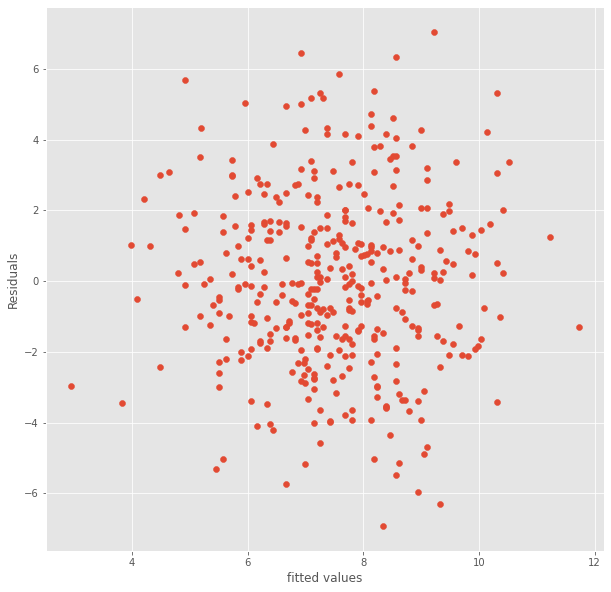

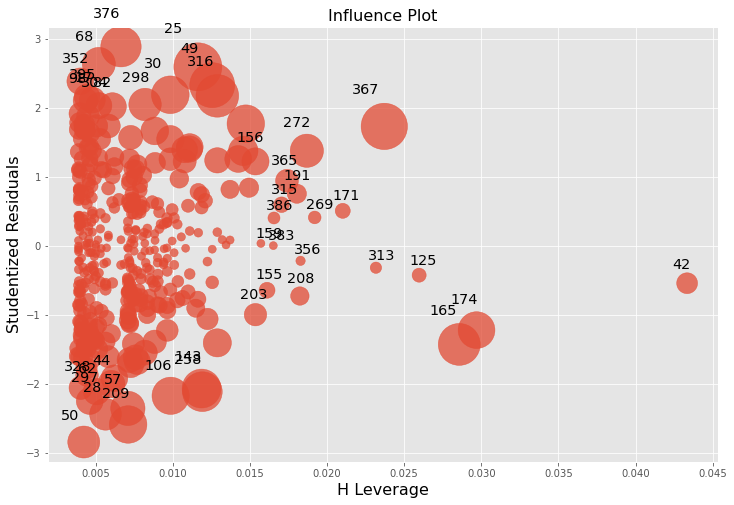

In [27]:
# diagnostic plots
fix, ax= plt.subplots(figsize=(10,10))
ax.scatter(estimate.fittedvalues, estimate.resid.values)
ax.set_xlabel('fitted values')
ax.set_ylabel('Residuals')
# studentized residuals vs leverages
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(estimate, alpha  = 0.05, ax = ax, criterion="cooks")